In [21]:
%pylab
%matplotlib inline

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Cedric\anaconda3\envs\environment\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [22]:
import numpy 
import math
import random
import operator
from PIL import Image
import pandas as pd

All necessary functions from kmeans_from_scratch.ipynb

In [23]:
# Distance calculation

def calculate_distance(a,b):

    a = numpy.array(a)
    b = numpy.array(b)
    distance_vector = a - b
    distance = numpy.sqrt(sum(distance_vector**2))
    return distance


# alternate initiation

def initiate_centroids(K,image):
    imagePixels = list(image.getdata())
    initial_centers = list()
    for x in range(K):
        initial_centers.append(list(imagePixels[random.randint(0,len(imagePixels)-1)]))
    return initial_centers


# List of closest centroids

def findClosestCentroids(centroids, image):
    
    imagePixels = list(image.getdata())
    assigned_centroid = []
    for p in imagePixels:
        distance = []
        for c in centroids:
            distance.append(calculate_distance(c, p))
        assigned_centroid.append(numpy.argmin(distance))
    return assigned_centroid


# Transforming the assignment list into a responsibility list

def assignment_to_responsbility(assigned_centroids):
    
    matrix = list()
    xm = max(assigned_centroids)+1

    for i in range(len(assigned_centroids)):
        a = [0]*xm  #creating a list filled xm with zeroes
        a[assigned_centroids[i]] = 1
        matrix.append(a)
    return matrix # matrix of responsibilities for each cluster and pixel


# Calculating the means of the clusters and creating a new list of clusters


def clustermeans(responsibility_list, image):

    resmat = numpy.array(responsibility_list) # converting the assigned centroids into an array for calculation
    Pixelarray = numpy.array(list(image.getdata())) # converting the Pixels into an array for calculation
    clusters = len(resmat[0]) # the amount of clusters
    dimensions = len(Pixelarray[1]) # the amount of dimensions of every pixel
    new_centroids = []
    for k in range(clusters): # Iterating over all clusters
        a = []
        for d in range(dimensions): # Iterating over all dimensions (R, G, B)
            dimensionaverage = numpy.mean(resmat[:,k]*Pixelarray[:,d]) # mean of R, G, or B of all the pixels assigned to cluster k
            a.append(dimensionaverage)
        new_centroids.append(a)
    return new_centroids

K Means Algorithm using defined functions

In [24]:
def k_means(image, K, max):
    
    centroids = initiate_centroids(K, image)

    new_centroids = []
    
    i = 0

    while i < max:  # Maximum of 6 iterations

        assignment_list = findClosestCentroids(centroids, image)

        responsibility_list = assignment_to_responsbility(assignment_list) 

        new_centroids = clustermeans(responsibility_list, image) # New Centroids

        if new_centroids == centroids:  # End algortihm, if centroids don't change
            break
        i += 1
        
    final_assignment = assignment_list

    rgb_array = numpy.array([[255,255,255]]*len(final_assignment))
    for i in range(3):
        rgb_array[:,i] = rgb_array[:,i]*final_assignment
    rgb_array
    rgb_list = []
    for i in range(len(rgb_array)):
        rgb_list.append(tuple(rgb_array[i]))

    image_out = Image.new(image.mode,image.size)
    image_out.putdata(rgb_list)
    image_out

    return image_out  # Assignment list can be used to create picture


Opening image

In [25]:
image = Image.open("../data/Cell_Nuclei_cut.jpg",'r')
width, height=image.size

Testing and saving Test

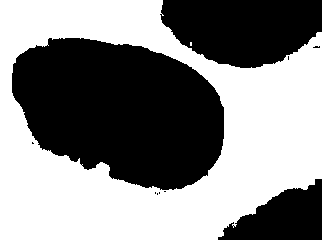

In [31]:
segmented_image = k_means(image,2, 15)
segmented_image.save('../data/test_out.png')
segmented_image # still somewhat inconsistent